In [74]:
%load_ext autoreload
%autoreload 2

import logging
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint
import defi.dao_cross.supply_demand as ddcrsede

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
try:
    import pulp
except ImportError:
    !sudo /bin/bash -c "(source /venv/bin/activate; pip install pulp)"
    import pulp
import defi.dao_cross.optimize as ddacropt

In [76]:
hdbg.init_logger(verbosity=logging.DEBUG)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.1' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
DEBUG > (git branch --show-current) 2>&1
DEBUG > (git rev-parse --short HEAD) 2>&1
DEBUG > (git log --date=local --oneline --graph --date-order --decorate --pretty=format:'%h %<(8)%aN%  %<(65)%s (%>(14)%ar) %ad %<(10)%d' -3) 2>&1
INFO  # Git
  branch_name='Issue139_Create_some_pathological_cases_for_supply_demand_curve'
  hash='a296c16ca'
  # Last commits:
    * a296c16ca dan      checkpoint                                                        ( 6 minutes ago) Mon Apr 24 15:21:58 2023  (HEAD -> Issue139_Create_some_pathological_cases_for_supply_demand_curve, origin/Issue139_Create_some_pathological_case

# Pathological cases

## Get orders and set prices.

In [77]:
supply_orders1 = ddcrsede.get_supply_orders1()
supply_orders1

[timestamp=2023-04-24 15:28:07.232544+00:00 action=sell quantity=40.0 base_token=BTC limit_price=100.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.232609+00:00 action=sell quantity=40.0 base_token=BTC limit_price=60.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.232618+00:00 action=sell quantity=30.0 base_token=BTC limit_price=40.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.232624+00:00 action=sell quantity=30.0 base_token=BTC limit_price=30.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.232632+00:00 action=sell quantity=20.0 base_token=BTC limit_price=20.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.232639+00:00 action=sell quantity=20.0 base_token=BTC limit_price=10.0 quote_token=ETH deposit_address=1 wallet_address=1]

In [78]:
demand_orders = ddcrsede.get_demand_orders1()
demand_orders

[timestamp=2023-04-24 15:28:07.262861+00:00 action=buy quantity=10.0 base_token=BTC limit_price=110.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.262905+00:00 action=buy quantity=30.0 base_token=BTC limit_price=100.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.262913+00:00 action=buy quantity=20.0 base_token=BTC limit_price=80.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.262922+00:00 action=buy quantity=40.0 base_token=BTC limit_price=60.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.262927+00:00 action=buy quantity=50.0 base_token=BTC limit_price=40.0 quote_token=ETH deposit_address=1 wallet_address=1,
 timestamp=2023-04-24 15:28:07.262932+00:00 action=buy quantity=30.0 base_token=BTC limit_price=30.0 quote_token=ETH deposit_address=1 wallet_address=1]

In [79]:
prices = {"BTC": 2, "ETH": 1}

## Multiple intersection points at quantity Q'

In [80]:
supply_curve1 = ddcrsede.get_curve(supply_orders1, "supply")
supply_curve1

[(0, 10.0),
 (20.0, 10.0),
 (20.0, 20.0),
 (40.0, 20.0),
 (40.0, 30.0),
 (70.0, 30.0),
 (70.0, 40.0),
 (100.0, 40.0),
 (100.0, 60.0),
 (140.0, 60.0),
 (140.0, 100.0),
 (180.0, 100.0)]

In [81]:
demand_curve = ddcrsede.get_curve(demand_orders, "demand")
demand_curve

[(0, 110.0),
 (10.0, 110.0),
 (10.0, 100.0),
 (40.0, 100.0),
 (40.0, 80.0),
 (60.0, 80.0),
 (60.0, 60.0),
 (100.0, 60.0),
 (100.0, 40.0),
 (150.0, 40.0),
 (150.0, 30.0),
 (180.0, 30.0)]

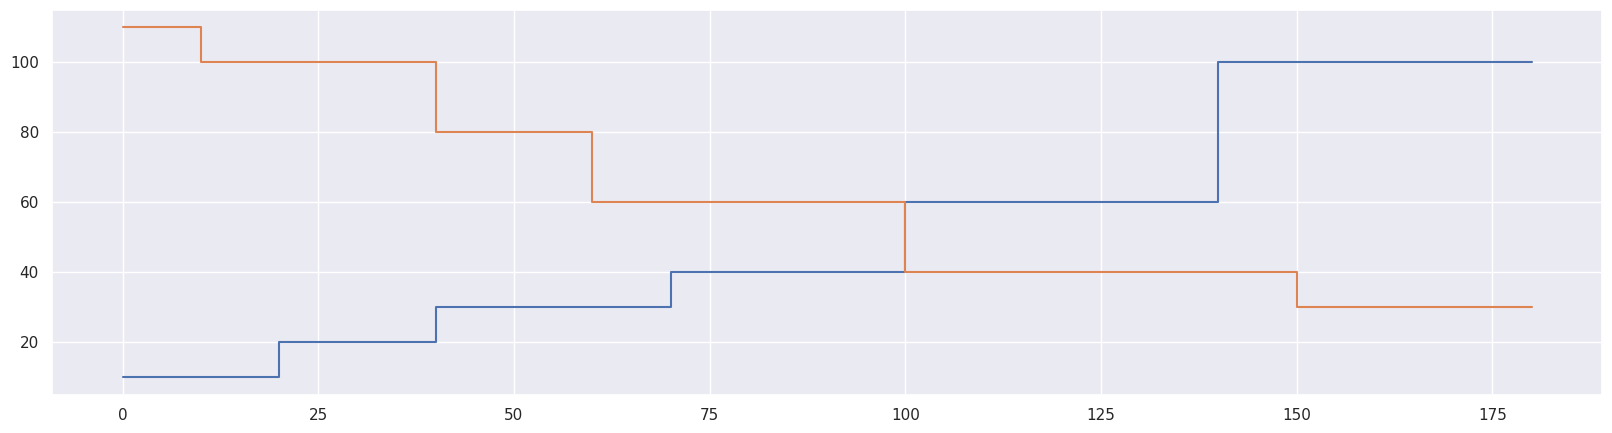

In [82]:
plt.plot(*zip(*supply_curve1))
plt.plot(*zip(*demand_curve))
plt.show()

In [83]:
all_orders1 = supply_orders1 + demand_orders
daocross_results1 = ddacropt.run_daocross_solver(all_orders1, prices)
display(daocross_results1)

DEBUG orders=[timestamp=2023-04-24 15:28:07.232544+00:00 action=sell quantity=40.0 base_token=BTC limit_price=100.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.232609+00:00 action=sell quantity=40.0 base_token=BTC limit_price=60.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.232618+00:00 action=sell quantity=30.0 base_token=BTC limit_price=40.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.232624+00:00 action=sell quantity=30.0 base_token=BTC limit_price=30.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.232632+00:00 action=sell quantity=20.0 base_token=BTC limit_price=20.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.232639+00:00 action=sell quantity=20.0 base_token=BTC limit_price=10.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.262861+00:00 action=buy quantity=10.0

/venv/lib/python3.8/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-04-24 15:28:07.232544+00:00,sell,40,BTC,100,ETH,1,0.0,0.0,NaN
1,2023-04-24 15:28:07.232609+00:00,sell,40,BTC,60,ETH,1,0.0,0.0,NaN
2,2023-04-24 15:28:07.232618+00:00,sell,30,BTC,40,ETH,1,0.0,0.0,NaN
3,2023-04-24 15:28:07.232624+00:00,sell,30,BTC,30,ETH,1,0.0,0.0,NaN
4,2023-04-24 15:28:07.232632+00:00,sell,20,BTC,20,ETH,1,0.0,0.0,NaN
5,2023-04-24 15:28:07.232639+00:00,sell,20,BTC,10,ETH,1,0.0,0.0,NaN
6,2023-04-24 15:28:07.262861+00:00,buy,10,BTC,110,ETH,1,0.0,0.0,NaN
7,2023-04-24 15:28:07.262905+00:00,buy,30,BTC,100,ETH,1,0.0,0.0,NaN
8,2023-04-24 15:28:07.262913+00:00,buy,20,BTC,80,ETH,1,0.0,0.0,NaN
9,2023-04-24 15:28:07.262922+00:00,buy,40,BTC,60,ETH,1,0.0,0.0,NaN


## Multiple intersection points at price P'

In [84]:
quantity_const = 10.0
supply_orders2 = ddcrsede.get_supply_orders1(quantity_const=quantity_const)
supply_curve2 = ddcrsede.get_curve(supply_orders2, "supply")
supply_curve2

[(0, 10.0),
 (30.0, 10.0),
 (30.0, 20.0),
 (60.0, 20.0),
 (60.0, 30.0),
 (100.0, 30.0),
 (100.0, 40.0),
 (140.0, 40.0),
 (140.0, 60.0),
 (190.0, 60.0),
 (190.0, 100.0),
 (240.0, 100.0)]

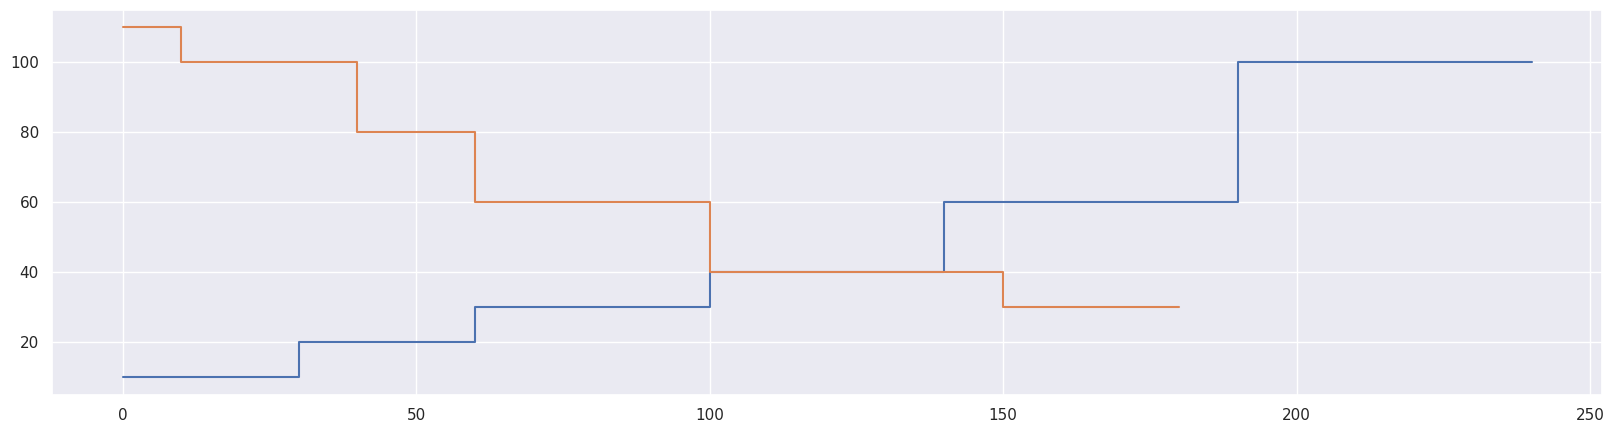

In [85]:
plt.plot(*zip(*supply_curve2))
plt.plot(*zip(*demand_curve))
plt.show()

In [86]:
all_orders2 = supply_orders2 + demand_orders
daocross_results2 = ddacropt.run_daocross_solver(all_orders2, prices)
display(daocross_results2)

DEBUG orders=[timestamp=2023-04-24 15:28:07.716535+00:00 action=sell quantity=50.0 base_token=BTC limit_price=100.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.716591+00:00 action=sell quantity=50.0 base_token=BTC limit_price=60.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.716599+00:00 action=sell quantity=40.0 base_token=BTC limit_price=40.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.716605+00:00 action=sell quantity=40.0 base_token=BTC limit_price=30.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.716610+00:00 action=sell quantity=30.0 base_token=BTC limit_price=20.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.716616+00:00 action=sell quantity=30.0 base_token=BTC limit_price=10.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.262861+00:00 action=buy quantity=10.0

/venv/lib/python3.8/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-04-24 15:28:07.716535+00:00,sell,50,BTC,100,ETH,1,0.0,0.0,NaN
1,2023-04-24 15:28:07.716591+00:00,sell,50,BTC,60,ETH,1,0.0,0.0,NaN
2,2023-04-24 15:28:07.716599+00:00,sell,40,BTC,40,ETH,1,0.0,0.0,NaN
3,2023-04-24 15:28:07.716605+00:00,sell,40,BTC,30,ETH,1,0.0,0.0,NaN
4,2023-04-24 15:28:07.716610+00:00,sell,30,BTC,20,ETH,1,0.0,0.0,NaN
5,2023-04-24 15:28:07.716616+00:00,sell,30,BTC,10,ETH,1,0.0,0.0,NaN
6,2023-04-24 15:28:07.262861+00:00,buy,10,BTC,110,ETH,1,0.0,0.0,NaN
7,2023-04-24 15:28:07.262905+00:00,buy,30,BTC,100,ETH,1,0.0,0.0,NaN
8,2023-04-24 15:28:07.262913+00:00,buy,20,BTC,80,ETH,1,0.0,0.0,NaN
9,2023-04-24 15:28:07.262922+00:00,buy,40,BTC,60,ETH,1,0.0,0.0,NaN


## No intersection, demand is higher

In [87]:
quantity_const = 100.0
supply_orders3 = ddcrsede.get_supply_orders1(quantity_const=quantity_const)
supply_curve3 = ddcrsede.get_curve(supply_orders3, "supply")
supply_curve3

[(0, 10.0),
 (120.0, 10.0),
 (120.0, 20.0),
 (240.0, 20.0),
 (240.0, 30.0),
 (370.0, 30.0),
 (370.0, 40.0),
 (500.0, 40.0),
 (500.0, 60.0),
 (640.0, 60.0),
 (640.0, 100.0),
 (780.0, 100.0)]

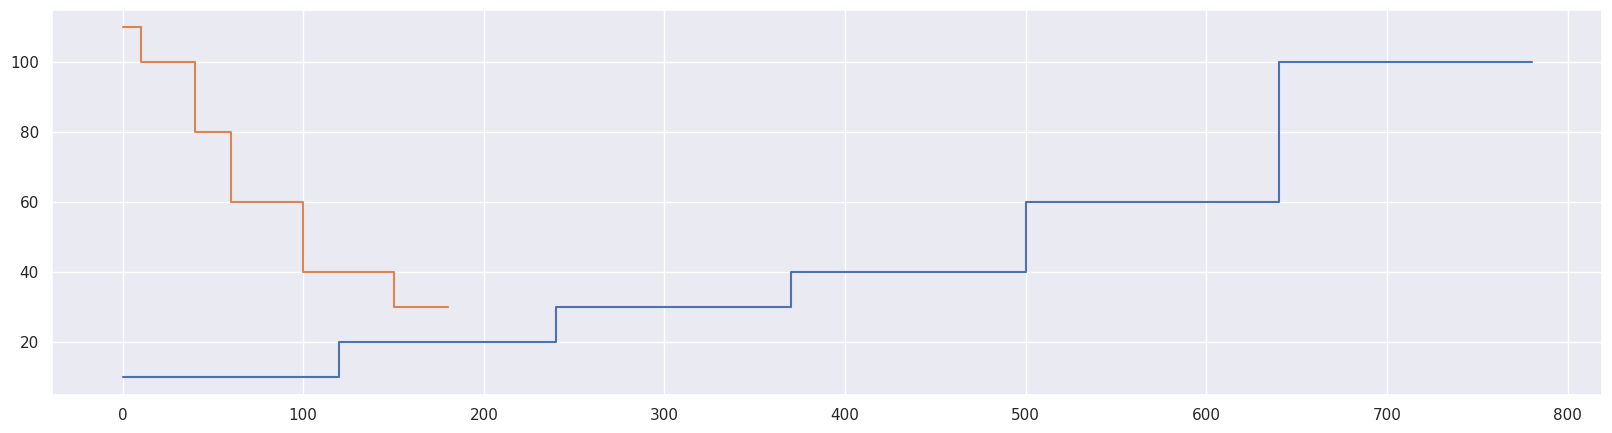

In [88]:
plt.plot(*zip(*supply_curve3))
plt.plot(*zip(*demand_curve))
plt.show()

In [89]:
all_orders3 = supply_orders3 + demand_orders
daocross_results3 = ddacropt.run_daocross_solver(all_orders3, prices)
display(daocross_results3)

DEBUG orders=[timestamp=2023-04-24 15:28:08.080984+00:00 action=sell quantity=140.0 base_token=BTC limit_price=100.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:08.081043+00:00 action=sell quantity=140.0 base_token=BTC limit_price=60.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:08.081052+00:00 action=sell quantity=130.0 base_token=BTC limit_price=40.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:08.081060+00:00 action=sell quantity=130.0 base_token=BTC limit_price=30.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:08.081066+00:00 action=sell quantity=120.0 base_token=BTC limit_price=20.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:08.081072+00:00 action=sell quantity=120.0 base_token=BTC limit_price=10.0 quote_token=ETH deposit_address=1 wallet_address=1, timestamp=2023-04-24 15:28:07.262861+00:00 action=buy quantit

/venv/lib/python3.8/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address,q_pi_star,q_tau_star,effective_price
0,2023-04-24 15:28:08.080984+00:00,sell,140,BTC,100,ETH,1,0.0,0.0,NaN
1,2023-04-24 15:28:08.081043+00:00,sell,140,BTC,60,ETH,1,0.0,0.0,NaN
2,2023-04-24 15:28:08.081052+00:00,sell,130,BTC,40,ETH,1,0.0,0.0,NaN
3,2023-04-24 15:28:08.081060+00:00,sell,130,BTC,30,ETH,1,0.0,0.0,NaN
4,2023-04-24 15:28:08.081066+00:00,sell,120,BTC,20,ETH,1,0.0,0.0,NaN
5,2023-04-24 15:28:08.081072+00:00,sell,120,BTC,10,ETH,1,0.0,0.0,NaN
6,2023-04-24 15:28:07.262861+00:00,buy,10,BTC,110,ETH,1,0.0,0.0,NaN
7,2023-04-24 15:28:07.262905+00:00,buy,30,BTC,100,ETH,1,0.0,0.0,NaN
8,2023-04-24 15:28:07.262913+00:00,buy,20,BTC,80,ETH,1,0.0,0.0,NaN
9,2023-04-24 15:28:07.262922+00:00,buy,40,BTC,60,ETH,1,0.0,0.0,NaN


# No intersection, demand is lower

In [90]:
# TODO(Dan): Implement